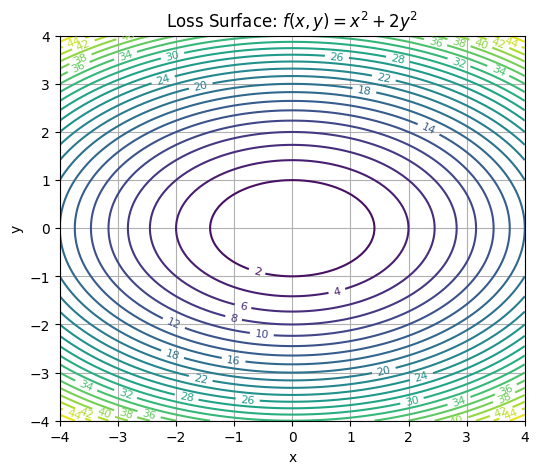

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function
def loss_fn(x, y):
    return x**2 + 2*y**2

# Gradient of the loss function
def grad_fn(x, y):
    return np.array([2*x, 4*y])

# Generate meshgrid for plotting
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_fn(X, Y)

# Plotting the contour
plt.figure(figsize=(6, 5))
contours = plt.contour(X, Y, Z, levels=30)
plt.clabel(contours, inline=True, fontsize=8)
plt.title("Loss Surface: $f(x, y) = x^2 + 2y^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [2]:
# Shared setup
init_point = np.array([-3.0, 3.0])
steps = 20

# ==============================
# Momentum Optimizer
# ==============================
def momentum_optimizer(alpha=0.1, beta=0.9):
    x = init_point.copy()
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [loss_fn(*x)]
    
    for t in range(steps):
        grad = grad_fn(*x)
        v = beta * v - alpha * grad
        x = x + v
        path.append(x.copy())
        losses.append(loss_fn(*x))
        
    return np.array(path), losses

# ==============================
# Adam Optimizer
# ==============================
def adam_optimizer(alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = init_point.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [loss_fn(*x)]
    
    for t in range(1, steps + 1):  # Start from 1 for bias correction
        grad = grad_fn(*x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        x = x - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
        path.append(x.copy())
        losses.append(loss_fn(*x))
    
    return np.array(path), losses


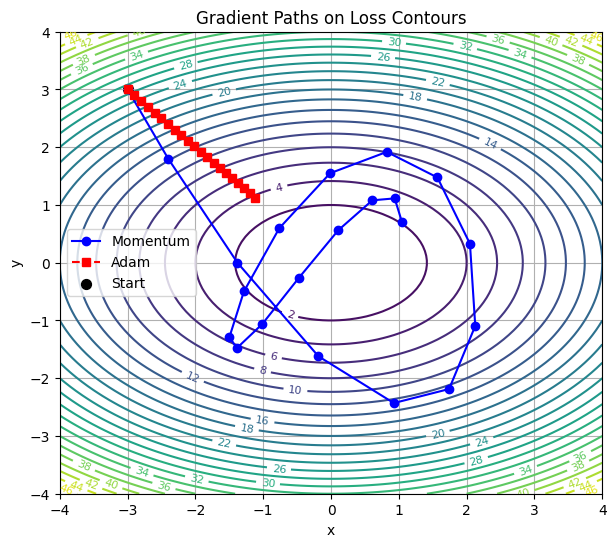

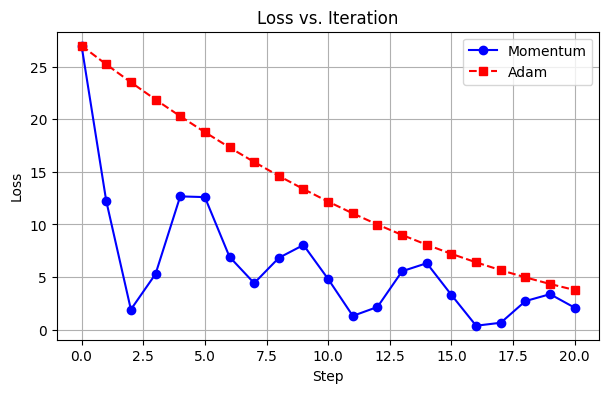

In [3]:
# Run optimizers
momentum_path, momentum_losses = momentum_optimizer()
adam_path, adam_losses = adam_optimizer()

# ----------------------------------
# 1. Contour Plot with Paths
# ----------------------------------
plt.figure(figsize=(7, 6))
contours = plt.contour(X, Y, Z, levels=30)
plt.clabel(contours, inline=True, fontsize=8)

# Plot Momentum Path
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'o-', label='Momentum', color='blue')

# Plot Adam Path
plt.plot(adam_path[:, 0], adam_path[:, 1], 's--', label='Adam', color='red')

# Starting point
plt.scatter(*init_point, color='black', s=50, label='Start')

plt.title("Gradient Paths on Loss Contours")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------
# 2. Loss History Plot
# ----------------------------------
plt.figure(figsize=(7, 4))
plt.plot(momentum_losses, 'o-', label='Momentum', color='blue')
plt.plot(adam_losses, 's--', label='Adam', color='red')
plt.title("Loss vs. Iteration")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
